<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [66]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [67]:
# separador de ;
datos_inmuebles = pd.read_csv('dataset.csv', sep=';')

## Ver los datos

In [68]:
datos_inmuebles.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374


## Verificando el tamaño del dataset

In [69]:
#datos_inmuebles.shape[0]
datos_inmuebles.shape

(5000, 4)

##  04 Obteniendo información de un DataFrame de pandas

Hay varias formas de obtener información de un DataFrame de pandas. Podemos identificar el conjunto de variables que componen el DataFrame y sus respectivos tipos a través de la propiedad dtypes, y también podemos obtener información más completa de un DataFrame usando el método info().

Usando su conocimiento de pandas, verifique a continuación las alternativas que informan sólo el número de registros en un DataFrame:

Selecciona 2 alternativas


len(DataFrame)

¡Correcta! La función len() de Python también informa el número de líneas en un DataFrame.

Alternativa correta
DataFrame.shape[0]

¡Correcta! Usando solo .shape, obtenemos una tupla con el número de registros y también el número de columnas del DataFrame.

DataFrame.size

¡Incorrecta! Este comando devuelve el número total de elementos en un DataFrame, es decir, el número de líneas versus el número de columnas. Si estuviéramos trabajando con una Series, este comando devolvería el total de registros.

Alternativa correta
DataFrame.len()

¡Incorrecta! El método len() no existe en la biblioteca pandas.

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [70]:
datos_inmuebles.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [71]:
datos_inmuebles.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


no se tiene correlaciones fuertes es decir que los atributos son buenos

## 06 Análisis descriptivo de los datos del modelo

En cuanto el análisis descriptivo de los datos del modelo, verifique la alternativa correcta:

Puede sospechar la presencia de outliers con solo mirar los estadísticos descriptivos reportados por el método describe() de pandas.


¡Correcta! Valores mínimos y máximos muy diferentes de los otros estadísticos pueden hacernos sospechar de la presencia de outliers.

Un coeficiente de correlación negativo indica que ambas variables se dirigen en la misma dirección en forma decreciente.


¡Incorrecta! Un coeficiente de correlación negativo indica que la relación entre las variables es opuesta, es decir, cuando una varía hacia arriba, la otra varía hacia abajo.

Alternativa incorreta
El resultado de aplicar el método describe() en un DataFrame no informa los valores de 1º cuartil, mediana y 3º cuartil de los datos.


¡Incorrecta! Estos valores están representados por las líneas 25% (1º cuartil), 50% (mediana) y 75% (3º cuartil).

Alternativa incorreta
Es deseable, en un modelo de regresión lineal, que las variables explicativas estén fuertemente correlacionadas.


¡Incorrecta! Es todo lo contrario. Lo deseable es que las variables explicativas no estén fuertemente correlacionadas. Es deseable también que haya una fuerte correlación entre la variable dependiente (Y) y las explicativas (X).

## 07 Haga lo que hicimos en aula: Análisis preliminar

Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante esta clase:

Descargar el proyecto de formación inicial
Importar pandas
Leer y ver los datos
Comprobar el tamaño del dataset
Crear una tabla con estadísticos descriptivos de los datos del dataset
Crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.
Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo que se vio en los videos para poder continuar con el siguiente video.

Opinión del instructor

Continúa con tus estudios, y si tienes alguna pregunta, ¡no dudes en utilizar nuestro foro!

 ## 08 Lo que aprendimos

Lo que aprendimos en esta aula:

Como importar la biblioteca pandas.
Como leer y ver los datos.
Como comprobar el tamaño del dataset.
Como crear una tabla con estadísticos descriptivos de los datos del dataset.
Como crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.

# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [72]:
import seaborn as sns

## Configuración del formato de los gráficos

In [73]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

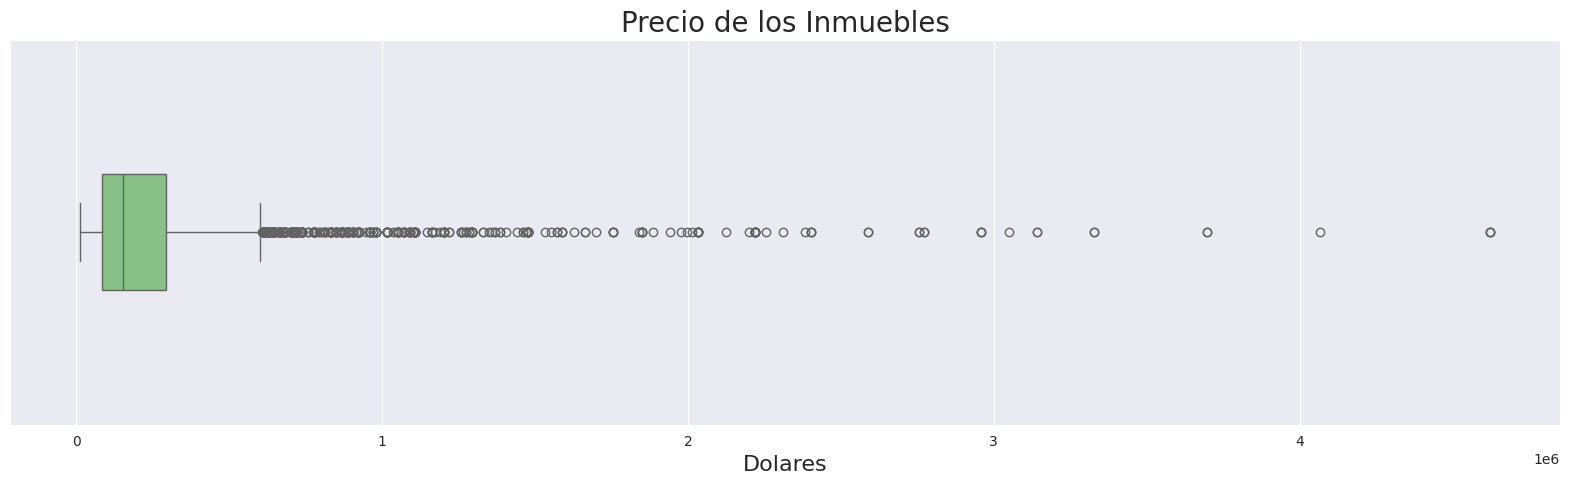

In [74]:
ax=sns.boxplot(data=datos_inmuebles['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

La variable tiene cmpórtamiento atipico con varios vallores por encima del valor superior

 ## 03 Box-plot

1º cuartil, mediana y 3º cuartil.
¡Correcta! Como podemos ver con la siguiente figura:

1º cuartil, promedio y 3º cuartil.


¡Incorrecta! La media aritmética no es parte de la construcción de un box-plot.

Mínimo, mediana y máximo.


¡Incorrecta! Los valores mínimo y máximo de una variable no son necesarios para construir un box-plot.

Alternativa incorreta
Promedio, mediana y moda.


¡Incorrecta! Promedio y moda no forman parte de la construcción de un box-plot. Recordando que la moda representa el valor más frecuente en la distribución.

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/tmp/ipython-input-2944628173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos_inmuebles['Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Precio de los Inmuebles (US$)', ylabel='Density'>

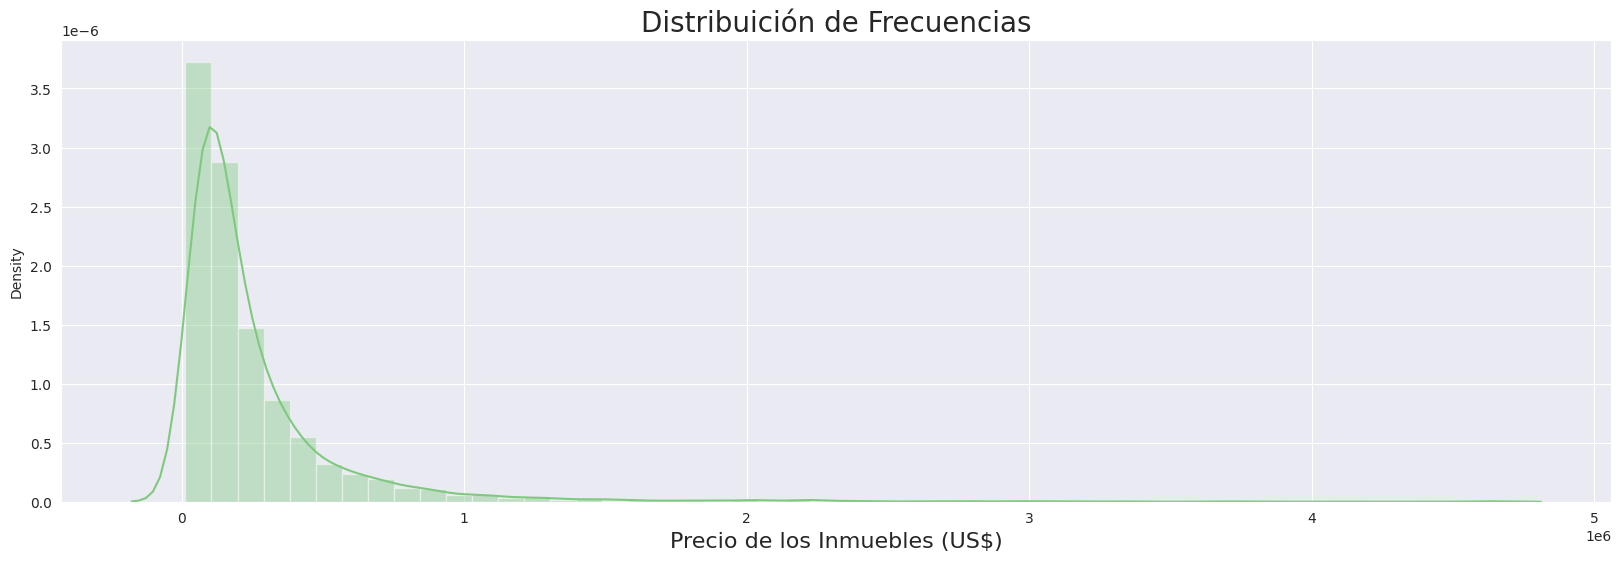

In [75]:
ax=sns.distplot(datos_inmuebles['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
ax

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

## 05 Asimetría de los datos

En nuestro curso vamos a trabajar con datos asimétricos, como vimos en el último video. Las siguientes alternativas muestran una representación gráfica de los comportamientos de las distribuciones de una variable que se pueden encontrar. ¿Qué imagen es la correcta?

Seleccione una alternativa

como la grafica anterior

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

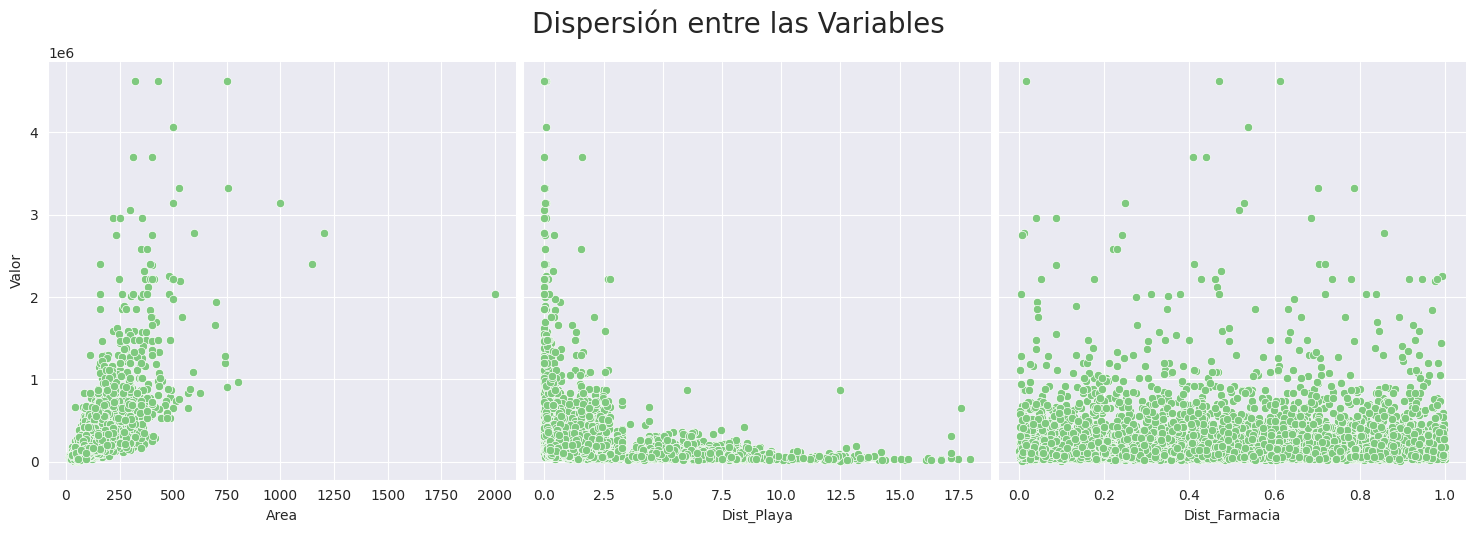

In [76]:
ax=sns.pairplot(datos_inmuebles,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

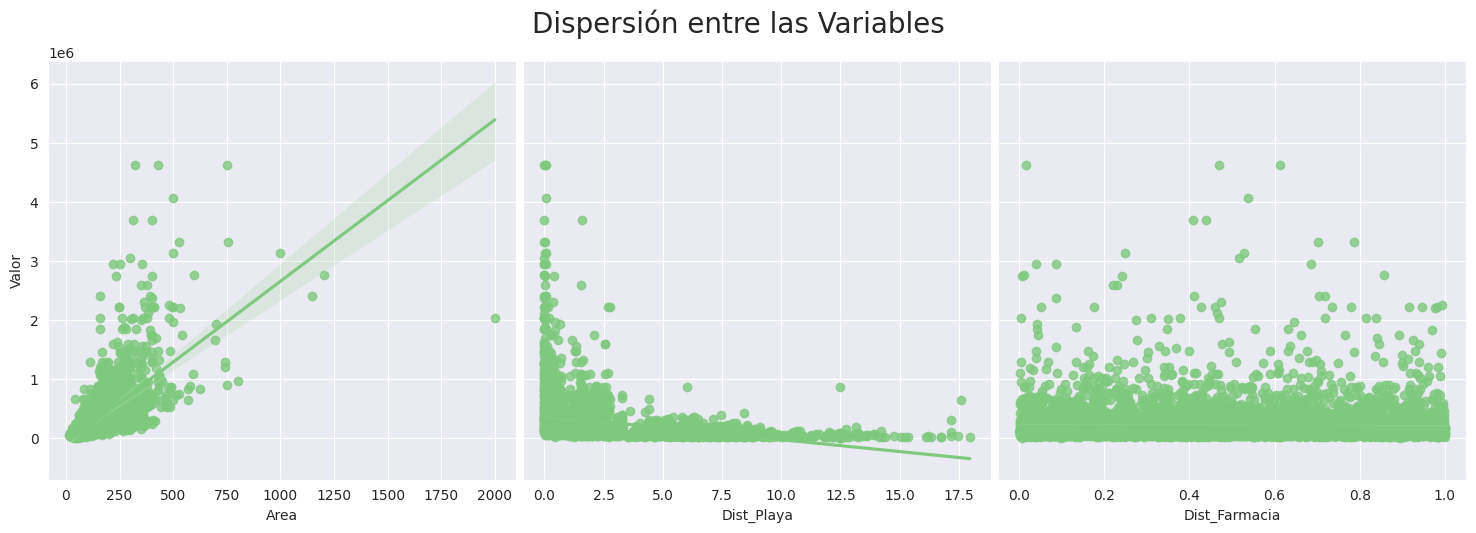

In [77]:
ax=sns.pairplot(datos_inmuebles,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [78]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [79]:
np.log(0)

/tmp/ipython-input-2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

EL MODELO NO ADMITE VALORES INDEFINIDOS

In [80]:
# HACIENDO LOGARITOO A TYODAS LAS COLUMNAS
datos_inmuebles['log_Valor']=np.log(datos_inmuebles['Valor'])
datos_inmuebles['log_Area']=np.log(datos_inmuebles['Area'])
# PARA LA VARIABLE PLAYA Y FARMNACIA SE HACE ESCALIZACION POR LOS VALORES CERO
datos_inmuebles['log_Dist_Playa']=np.log(datos_inmuebles['Dist_Playa']+1)
datos_inmuebles['log_Dist_Farmacia']=np.log(datos_inmuebles['Dist_Farmacia']+1)

In [81]:
# TODO EL DATA FRAME EN LOGARITMO O NORMALIZADA
datos_inmuebles.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


## Distribuición de frecuencias de la variable *dependiente transformada* (y)

In [82]:
datos_inmuebles.tail(3)

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
4997,147874,70,0.253138,0.421407,11.904116,4.248495,0.225651,0.351647
4998,35120,55,8.945226,0.680963,10.466526,4.007333,2.297093,0.519367
4999,101664,94,0.774444,0.027916,11.529429,4.543295,0.573487,0.027533


In [83]:
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Valor              5000 non-null   int64  
 1   Area               5000 non-null   int64  
 2   Dist_Playa         5000 non-null   float64
 3   Dist_Farmacia      5000 non-null   float64
 4   log_Valor          5000 non-null   float64
 5   log_Area           5000 non-null   float64
 6   log_Dist_Playa     5000 non-null   float64
 7   log_Dist_Farmacia  5000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 312.6 KB


/tmp/ipython-input-3238973690.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos_inmuebles['log_Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='log del Precio de los Inmuebles', ylabel='Density'>

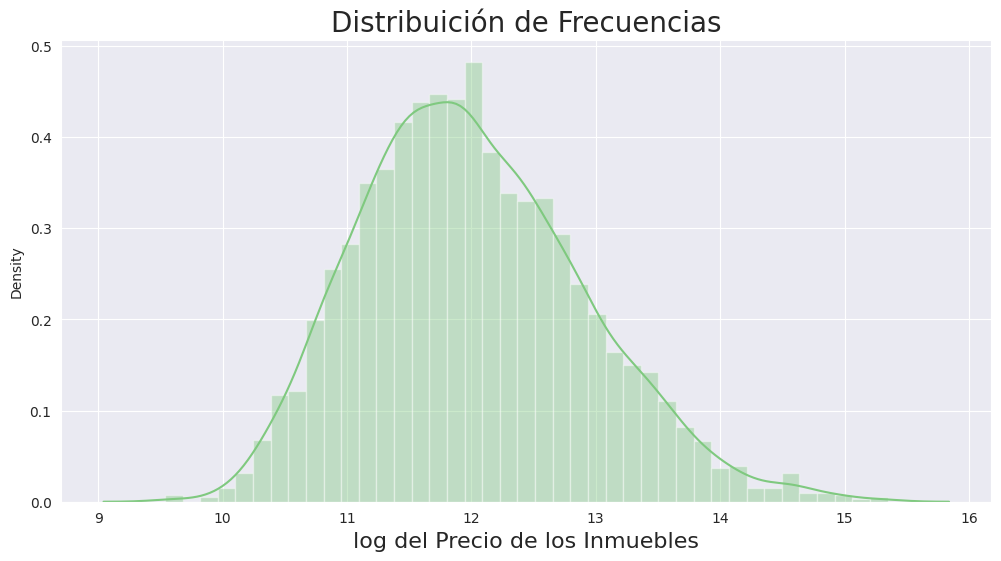

In [84]:
# GRAFICANDO LOS VALORES YA CON EL LOGARITMO
ax=sns.distplot(datos_inmuebles['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

SE REDUCE LA AIMETRIA DE EL DATA FRAME Y PASA A SER MAS NORMALIZADA

## 03 ¿Por qué transformar los datos?

Acerca de la transformación de datos, marque la alternativa correcta:

Alternativa incorreta
Una de las principales razones para transformar algunos tipos de datos es intentar corregir la asimetría que la distribución de los datos pueda presentar.


¡Correcta! Este fue el principal objetivo de la transformación que llevamos a cabo en nuestro curso.

Las variables que presentan su distribución, siguiendo el patrón de una distribución normal, son fuertes candidatas a transformaciones logarítmicas.


¡Incorrecta! Es todo lo contrario. Buscamos variables que tengan distribuciones muy cercanas a la normal.

Alternativa incorreta
Una de las principales razones para transformar algunos tipos de datos es intentar corregir la simetría que la distribución de los datos pueda presentar.


¡Incorrecta! Lo correcto sería "corregir la asimetría".

Alternativa incorreta
Solo existe un tipo de transformación de datos para los modelos de regresión lineal, la transformación logarítmica.


¡Incorrecta! El tipo de transformación dependerá del comportamiento de la distribución de la variable. Las variables con asimetría a la derecha generalmente se transforman usando el logaritmo.

## 07 Relación entre las variables dependiente y explicativas

Califique las siguientes afirmaciones y responda:

La función pairplot(), del paquete seaborn, permite graficar solo los histogramas de las variables de un DataFrame;

Los diagramas de dispersión permiten identificar la relación entre dos variables;

Es posible trazar una recta de regresión entre dos variables usando la función pairplot() de seaborn.

Alternativa incorreta
Solo las declaraciones 2 y 3 son correctas.


¡Correcta! Usando diagramas de dispersión, podemos identificar si dos variables tienen una relación lineal entre ellas y también la dirección de esta relación.

Solo las declaraciones 1 y 3 son correctas.


¡Incorrecta! La función pairplot() grafica los histogramas de cada variable y también los diagramas de dispersión entre todas las variables en un DataFrame.

Alternativa incorreta
Todas las declaraciones son correctas.


¡Incorrecta! La función pairplot() grafica los histogramas de cada variable y también los diagramas de dispersión entre todas las variables en un DataFrame.

Alternativa incorreta
Solo las declaraciones 1 y 2 son correctas.


¡Incorrecta! La función pairplot() grafica los histogramas de cada variable y también los diagramas de dispersión entre todas las variables en un DataFrame.

## 08 Haga lo que hicimos en aula: Análisis gráfico

Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante este video:

Importar la biblioteca seaborn
Configurar el formato de los gráficos
Construir el box-plot de la variable dependiente
Graficar la distribución de frecuencias de la variable dependiente
Graficar los diagramas de dispersión entre las variables del dataset
Analizar la dispersión entre las variables
Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo que se vio en los videos para poder continuar con el siguiente video.

Ver opinión del instructor
Opinión del instructor

Continúa con tus estudios, y si tienes alguna pregunta, ¡no dudes en utilizar nuestro foro!

 ## 09 Lo que aprendimos

Lo que aprendimos en esta aula:

Como configurar el formato de los gráficos.
Como construir el box-plot de la variable dependiente.
Como graficar la distribución de frecuencias de la variable dependiente.
Como graficar los diagramas de dispersión entre las variables del dataset.
Análisis de dispersión entre las variables.

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

vamos a trabajara con los datos del data frame y graficar la regrasion lineal con pairplot

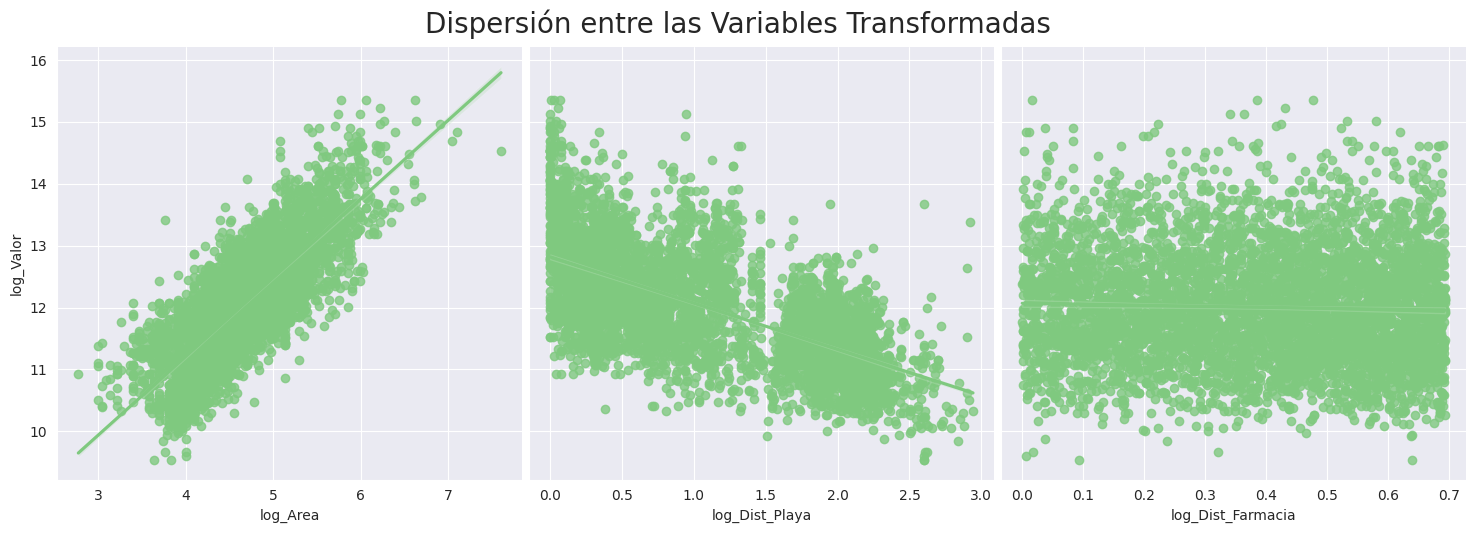

In [85]:
ax=sns.pairplot(datos_inmuebles,y_vars='log_Valor',x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

aca se ve que para playa y la farmacia concuerdan con la distribucion de correlacion que son negativas

## 05 Un poco más sobre las transformaciones logarítmicas

Usamos la biblioteca numpy para realizar la transformación de datos. numpy es un paquete fundamental para la computación científica en Python, que proporciona un conjunto muy amplio de operaciones matriciales y matemáticas.

Con base en nuestros videos, marque la opción que muestra la forma correcta de realizar la transformación logarítmica de la variable Valor, del DataFrame datos. Suponga que esta variable tiene algunos registros con valor cero.

Seleccione una alternativa
Usamos la biblioteca numpy para realizar la transformación de datos. numpy es un paquete fundamental para la computación científica en Python, que proporciona un conjunto muy amplio de operaciones matriciales y matemáticas.

Con base en nuestros videos, marque la opción que muestra la forma correcta de realizar la transformación logarítmica de la variable Valor, del DataFrame datos. Suponga que esta variable tiene algunos registros con valor cero.




```python
# Tiene formato de código
import numpy as np
np.log(datos['Valor'] + 1)
```




¡Correcta! Como la variable tiene valores cero en algunos registros, la forma más correcta de transformación es agregar una constante, diferente de cero, a los datos, para evitar la pérdida de información, ya que log(0) no existe.


Alternativa incorreta
```python
# Tiene formato de código
import numpy as np
np.ln(datos['Valor'] + 1)
```

¡Incorrecta! La función ln() no existe en la biblioteca numpy.

Alternativa incorreta
```python
# Tiene formato de código
import numpy as np
np.ln(datos['Valor'])
```

¡Incorrecta! La función ln() no existe en la biblioteca numpy.

Alternativa incorreta
```python
# Tiene formato de código
import numpy as np
np.log(datos['Valor'])
```

¡Incorrecta! La variable Valor presenta registros con valor cero y, por lo tanto, para evitar la pérdida de información, la forma más correcta de transformación logarítmica sería agregar una constante distinta de cero a los datos.

¡Enhorabuena, has acertado!
 Discut

 ## 06 Haga lo que hicimos en aula: Transformación de variables

Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante este video:

Importar la biblioteca numpy
Aplicar la transformación logarítmica a los datos del dataset
Graficar la distribución de frecuencias de la variable dependiente transformada
Graficar los diagramas de dispersión entre las variables transformadas del dataset
Analizar la dispersión entre las variables transformadas
Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo que se vio en los videos para poder continuar con el siguiente video.

Ver opinión del instructor
Opinión del instructor

Continúa con tus estudios, y si tienes alguna pregunta, ¡no dudes en utilizar nuestro foro!

 ## 07 Lo que aprendimos

Lo que aprendimos en esta aula:

Como aplicar la transformación logarítmica a los datos del dataset.
Como graficar la distribución de frecuencias de la variable dependiente transformada.
Como graficar los diagramas de dispersión entre las variables transformadas del dataset.
Cómo analizar la dispersión entre las variables transformadas.

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [86]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [87]:
y=datos_inmuebles['log_Valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [88]:
X=datos_inmuebles[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [89]:
# devuelve cuatro elementos en una llista
# train entrenamiento y test prueba sice 0.2 es el porcentaje de prueba aca bajo al 20 %
# el 80% para  entrenamiento
#y random_state es la semilla del aleatorio para que se igual
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

In [90]:
X_train.head()

,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903


In [91]:
X_test.head()

,log_Area,log_Dist_Playa,log_Dist_Farmacia
1006,5.273000,1.282769,0.546323
3115,4.007333,1.930021,0.684319
4394,4.442651,1.684541,0.495648
3877,4.219508,0.357133,0.475526
1175,4.465908,1.696499,0.680696


In [92]:
y_train.head()

,log_Valor
2661,14.569608
912,10.590139
3042,11.133011
141,11.891540
3854,13.736698


In [93]:
y_test.head()

,log_Valor
1006,13.462263
3115,11.018596
4394,11.591117
3877,11.904116
1175,11.616438


# 03 Procedimiento estándar en Data Science

La técnica de separar aleatoriamente un dataset en dos conjuntos distintos (conjuntos de entrenamiento y de prueba), estimar el modelo con datos de uno de estos conjuntos (conjunto de entrenamiento) y luego realizar predicciones con datos del segundo conjunto (conjunto de prueba), es una técnica ampliamente utilizada en data science para confirmar la efectividad de los modelos estimados.

Indique, en las opciones siguientes, qué funcionalidad de scikit-learn usamos para realizar dicha separación de datos.

Seleccione una alternativa


```python
# Tiene formato de código
train_test_split()
```




¡Correcta! Para obtener más información sobre la función, acceda a la documentación de la biblioteca.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


```python
# Tiene formato de código
dataset_split()
```
¡Incorrecta! Esta funcionalidad no existe en la biblioteca sckit-learn.
```python
# Tiene formato de código
train_test()
```
¡Incorrecta! Esta funcionalidad no existe en la biblioteca sckit-learn.
```python
# Tiene formato de código
test_train_split()
```
¡Incorrecta! La función correcta es train_test_split().

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [94]:
import statsmodels.api as sm

## Estimando el modelo con statsmodels

vamos a trabajar el modelo con ln

In [95]:
#vreamos nuevo data frame con las variables explicativas pra modelo entrenamiento y prueba
#agragamos la constante para el modelo
X_train_con_constante=sm.add_constant(X_train)

In [96]:
#la columna fue añadida
X_train_con_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


el agregar la constante ayuda a que los errores sean reale con el U en la formulla

In [97]:
modelo_statsmodels=sm.OLS(y_train,X_train_con_constante,hascont=True).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [98]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:16:54   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

No. Observations:                4000  es el 80% de los datos
R-squared:                       0.805 alto
Adj. R-squared:                  0.805 GRado de verdad

R_2 ayuda a tpoma de deciciones
variable utiles ayudan al valor alto de verdades

log_Area              1.0580

log_Dist_Playa       -0.4905

F-statistic:                     5495.

prueba la significania conjunta de cada unio de  os betas de la formula

La estadisticas T prueba el de cada coeficiente

la columna preba t

pero pt para farmacia es de 0.603 es mayo la podemos descartar por ete criterio se puede sacar del modelo

la ultima tabla de resultados del modelo no la tenemos en cuenta

## 05 Estimando un modelo de regresión lineal con StatsModels

statsmodels es un módulo de Python que proporciona clases y funciones para estimar muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y minería de datos.

Basado en nuestro último vídeo, indique la alternativa que muestra el código necesario para estimar un modelo de regresión lineal con la biblioteca statsmodels.

Nota: y_train y X_train son los datasets de entrenamiento para crear nuestro modelo.

Seleccione una alternativa



```python
# Tiene formato de código
import statsmodels.api as sm
X_train_con_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hasconst = True).fit()
```
Correcta! Como la de nuestro notebook de estudio.



otra opcion
```python
# Tiene formato de código
import statsmodels.api as sm
X_train_con_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.fit(y_train, X_train_con_constante, hasconst = True).OLS()
```
Incorrecta! Los métodos fit() y OLS() se intercambian en el código arriba. Lo correcto sería:

```python
# Tiene formato de código
modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hasconst = True).fit()
```

otra opcion
```python
# Tiene formato de código

import statsmodels as sm
X_train_con_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hasconst = True).fit()
```
ncorrecta! Para este tipo de estimación, la importación correcta de biblioteca sería:
```python
# Tiene formato de código

import statsmodels.api as sm
```

otra opcion
```python
# Tiene formato de código

import statsmodels.api as sm
X_train_con_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hasconst = True)
```

Incorrecta! Para finalizar la estimación, aún necesitamos usar el método fit() en el objeto modelo_statsmodels

##  07 Pruebas formales de regresión lineal

La biblioteca statsmodels proporciona un conjunto más amplio de estadísticas de prueba sobre sus outputs. En nuestro curso, destacaremos las pruebas F y t.

Según lo que aprendimos en nuestro último video, juzgue los elementos a continuación y marque las alternativas correctas.

Selecciona 2 alternativas

La prueba t se usa para probar la significancia de cada parámetro individualmente.


¡Correcta! Prueba la hipótesis de que el coeficiente es igual a cero.


La prueba F se utiliza para probar simultáneamente la importancia de un conjunto de parámetros.


¡Correcta! Prueba la hipótesis de que todos los coeficientes de regresión son iguales a cero.

La prueba t se utiliza para probar simultáneamente la significancia de un conjunto de parámetros.


¡Incorrecta! Esta es la prueba F.

Alternativa correta
La prueba F se usa para probar la significancia de cada parámetro individualmente.


¡Incorrecta! Esta es la prueba t.

 ## 08 Interpretando las pruebas

Solo para ilustrar, considere el output del modelo estimado:

aula-img3-enu.png

Aprendemos a identificar cuándo las pruebas t y F indican que todo es correcto, y luego podemos rechazar la hipótesis de que los parámetros no son significativos individual y conjuntamente. Indique la alternativa que presenta la forma correcta de llegar a esta conclusión.

Seleccione una alternativa


Prueba de significancia conjunta de los parámetros

Prob(F-statistic) <= 0.05 (OK)
Prueba de significancia individual de los parámetros

P>|t| <= 0.05 (OK)

¡Correcta! Como vimos en nuestro notebook del curso.


Prueba de significancia conjunta de los parámetros

F-statistic <= 0.05 (OK)
Prueba de significancia individual de los parámetros

t <= 0.05 (OK)

¡Incorrecta! No son las estadísticas de prueba las que deberían ser inferiores a 0.05, sino Prob(F-statistic) y P>|t|.


Prueba de significancia conjunta de los parámetros

F-statistic > 0.05 (OK)
Prueba de significancia individual de los parámetros

t > 0.05 (OK)

¡Incorrecta! No son las estadísticas de prueba las que deben evaluarse, sino Prob(F-statistic) y P>|t|.

Prueba de significancia conjunta de los parámetros

Prob(F-statistic) > 0.05 (OK)
Prueba de significancia individual de los parámetros

P>|t| > 0.05 (OK)

¡Incorrecta! Esta es la situación en la que aceptamos la hipótesis de que los parámetros son iguales a cero, conjunta e individualmente.

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

In [99]:
# se acepta la hipotesis nula y se va a quitar del modelo
X=datos_inmuebles[['log_Area','log_Dist_Playa']]

## Creando los datasets de entrenamiento y de prueba

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

## Estimando el modelo con el statsmodels

In [101]:
X_train_con_constante=sm.add_constant(X_train)

In [102]:
modelo_statsmodels=sm.OLS(y_train,X_train_con_constante,hascont=True).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [103]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:16:54   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

la columna Pt todos en cero

R2 es 80 %
F satatic es 8244
este modelo esta bien especificado
mejorando con nuevas variables explicativas

mejorar las predicciones con el conjunto de datso sin la varibal farmacia

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [105]:
modelo=LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [106]:
modelo.fit(X_train,y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [107]:
#PRESIONANDO  alt SOSTENIDO + 1021 GENERE ESTE ² EL CUADRDO
#print('R²={}'.format(modelo.score(X_train,y_train).round(3)))
#print(f'R²={} {.format(modelo.score(X_train,y_train).round(3))}')
print('R²={}'.format(modelo.score(X_train,y_train)))

R²=0.8048774179849649


## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [108]:
#dataframe de predicciones
y_predicho=modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [109]:
#print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(3)))

print('R²={}'.format(metrics.r2_score(y_test,y_predicho)))

R²=0.7904431312469867


 ## 03 Proceso de estimación

Suponiendo que tenemos un conjunto de datos de entrenamiento, donde y_train son los datos de la variable dependiente y X_train son los datos de las variables explicativas. Indique la opción que muestra el código correcto para estimar un modelo de regresión lineal, utilizando la biblioteca scikit-learn.
Seleccione una alternativa


```python
# Tiene formato de código
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)
```

¡Correcta! Exactamente cómo procedemos en nuestro video. A partir de ese momento, podemos consultar la información de la estimación, generar métricas y hacer predicciones utilizando el objeto modelo.





```python
# Tiene formato de código
from sklearn.linear_model import LinearRegression
modelo = LinearRegression
modelo.fit(X_train, y_train)
```
¡Incorrecta! Al crear una instancia del objeto modelo, no olvide poner los paréntesis al final de la clase LinearRegression, así: LinearRegression().

```python
# Tiene formato de código
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(y_train, X_train)
```
¡Incorrecta! Los conjuntos de datos se ingresaron en el orden incorrecto para el método fit().

```python
# Tiene formato de código

from sklearn import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)
```
¡Incorrecta! Tenga en cuenta que la clase LinearRegression debe importarse desde sklearn.linear_model.



# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [112]:
#extraemos la primera linea de X_test
entrada=X_test[0:1]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando predicción puntual

In [114]:
entrada.info(_)

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 1006 to 1006
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_Area        1 non-null      float64
 1   log_Dist_Playa  1 non-null      float64
dtypes: float64(2)
memory usage: 24.0 bytes


In [113]:
#este es un arreglo data frame extraemos la posicion 0
modelo.predict(entrada)[0]

np.float64(12.596570808197772)

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [115]:
# ek valor de la anterior esta en logaritmo natural o neperiano
# en esta celda estamos haciendo la conversion a dolares el inverso de Lneperiano
np.exp(modelo.predict(entrada)[0])

np.float64(295543.35077471804)

## Creando un simulador simple

In [120]:
# haciendo una proyeccion con el modelo y los siguientes datos
Area=150
Dist_Playa=1
entrada=[[np.log(Area),np.log(Dist_Playa+1)]]

entrada

[[np.float64(5.0106352940962555), np.float64(0.6931471805599453)]]

In [121]:
#  este codigo estaba en el notebooK original print('US$ {}'.format(np.exp(modelo.predict(entrada)[0]).round(2)))
print('US$ {}'.format(np.exp(modelo.predict(entrada)[0])))

US$ 299013.6816227301


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 05 Predicciones con los datos transformados

Nuestro modelo utiliza datos que fueron transformados para resolver un problema de asimetría. Usamos la transformación logarítmica y por lo tanto nuestras predicciones estarán en esta misma escala. Para convertir nuestros datos al formato inicial, realizamos una nueva transformación. Marque la opción que muestra la función numpy utilizada para esa conversión.

Seleccione una alternativa

```python
# Tiene formato de código
exp()
```

¡Correcta! La función exponencial es la inversa del logaritmo natural que usamos en nuestros datos.


Alternativa incorreta
```python
# Tiene formato de código
sum()
```
¡Incorrecta! Esta función devuelve la suma de una lista de números.

Alternativa incorreta
```python
# Tiene formato de código
sqrt()
```
¡Incorrecta! Esta función devuelve la raíz cuadrada de un número. Lo que necesitamos es la función inversa de la transformación que hemos realizado en los datos.

Alternativa incorreta
```python
# Tiene formato de código
log()
```
¡Incorrecta! Esta es la función que usamos para realizar la transformación inicial. Lo que necesitamos es la inversa de esta función.

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [122]:
modelo.intercept_

np.float64(7.646667897902708)

In [123]:
np.exp(modelo.intercept_)

np.float64(2093.657672537765)

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

In [124]:
modelo.coef_

array([ 1.05807806, -0.49061238])

## Confirmando el orden de las variables explicativas en el DataFrame

In [125]:
X.columns

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [126]:
index=['Intercepto','log Área', 'log Distancia a la playa']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [127]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parámetros'])

,Parámetros
Intercepto,7.646668
log Área,1.058078
log Distancia a la playa,-0.490612


## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

## 07 Entendiendo el significado de los parámetros estimados

Considere la siguiente tabla con los coeficientes estimados del modelo:

Parámetros
Intercepto	7.646667
log Área	1.058078
log Distancia a la Playa	-0.490612
Verifique la alternativa que contiene una interpretación incorrecta de nuestros parámetros.

Seleccione una alternativa

Manteniendo constante el valor del área, un aumento del 1% en la distancia de un inmueble a la playa genera, en promedio, un aumento del 1.06% en el precio del inmueble.


¡Correcta! Interpretación incorrecta, en este caso, la interpretación correcta sería: manteniendo constante el valor del área, un aumento del 1% en la distancia de un inmueble a la playa genera, en promedio, una disminución del 0,49% en el precio del inmueble.

Manteniendo constante el valor del área, un aumento del 1% en la distancia de un inmueble a la playa genera, en promedio, una disminución del 0,49% en el precio del inmueble.


¡Incorrecta! Perfecto, esta es la interpretación del coeficiente de la variable Distancia a la playa.

Alternativa incorreta
Manteniendo constante el valor de la distancia a la playa, un aumento del 1% en el área de un inmueble genera, en promedio, un aumento del 1.06% en el precio del inmueble.


¡Incorrecta! Interpretación correcta, esta es la interpretación del coeficiente de la variable Área.

Alternativa incorreta
Excluyendo el efecto de las variables explicativas (área y distancia a la playa), el efecto medio sobre el precio del inmueble sería de US$ 2.093,66 (exp [7.646667]).


¡Incorrecta! Perfecto, esta es la interpretación del intercepto del modelo.

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [128]:
y_predicho_train=modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Predicción X Real'}, xlabel='log del Precio - Predicción', ylabel='log del Precio - Real'>

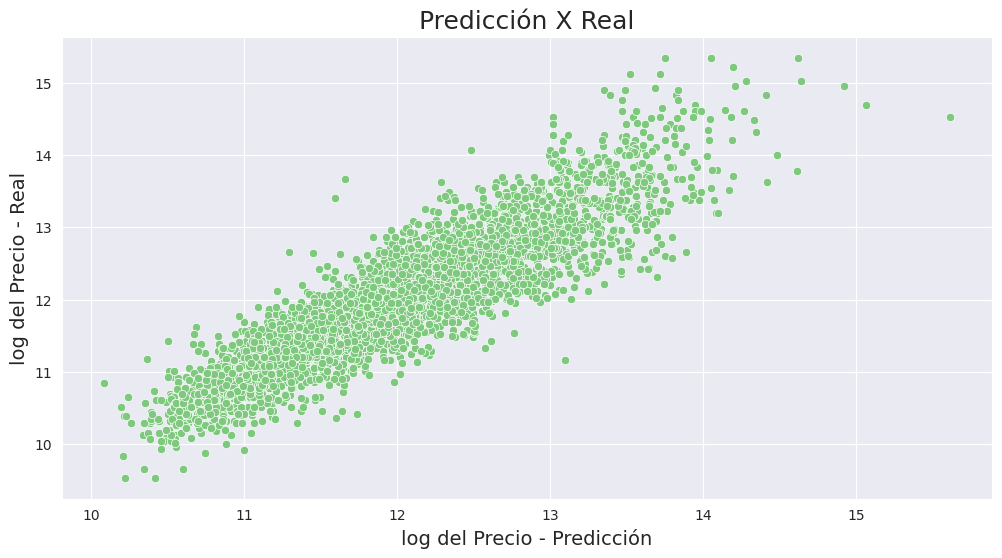

In [129]:
ax=sns.scatterplot(x=y_predicho_train,y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

## Obteniendo los residuos

In [132]:

# El termino U
residuo=y_train-y_predicho_train

## Graficando la distribuición de frecuencias de los residuos

/tmp/ipython-input-2338582065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(residuo)


<Axes: title={'center': 'Distribuición de Frecuencias de los Residuos'}, xlabel='log del Precio', ylabel='Density'>

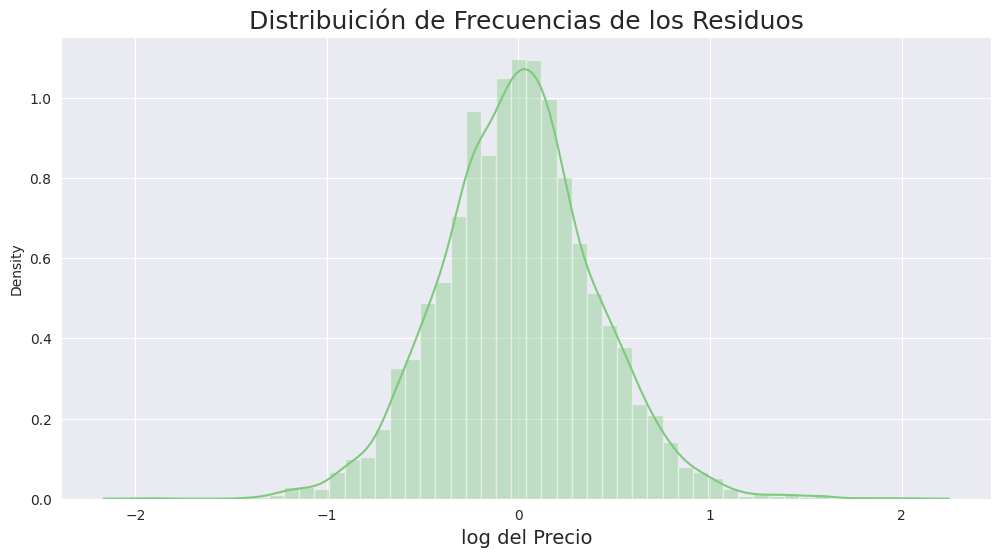

In [133]:
ax=sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax

##  09 Comprobando los resultados de la estimación

Acerca de los resultados de la estimación, evalúe las siguientes afirmaciones:

Los residuos del modelo se obtienen restando el valor observado de la variable dependiente (valor real) y el valor predicho por el modelo.

Para graficar la distribución de frecuencia de los residuos, podemos usar la función distplot() de la biblioteca seaborn.

Cuando graficamos la dispersión entre el valor real de la variable dependiente y los valores predichos por el modelo, esperamos encontrar una relación lineal bien ajustada (recta).

Seleccione una alternativa

Todas las declaraciones son correctas.


¡Correcta! Perfecto, asimilaste bien el contenido. Felicidades.

Solo las declaraciones 2 y 3 son correctas.


¡Incorrecta! La declaración 1 indica la forma correcta de obtener los residuos.

Alternativa incorreta
Solo las declaraciones 1 y 3 son correctas.


¡Incorrecta! Una de las formas de obtener un histograma es con la función distplot() de seaborn.

Solo las declaraciones 1 y 2 son correctas.


¡Incorrecta! Evalúe el enunciado 3. En la gráfica de dispersión entre real y predicho, esperamos encontrar una línea recta bien ajustada.

 ## 10 Haga lo que hicimos en aula: Regresión Lineal con Scikit-Learn

Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante este video:

Estimar el modelo lineal usando los datos de entrenamiento
Obtener el coeficiente de determinación (R²) del modelo estimado
Generar las predicciones para los datos de prueba del modelo
Obtener el coeficiente de determinación (R²) para las predicciones del modelo
Generar la predicción puntual del modelo
Invertir la transformación para obtener la estimación en dólares
Crear un simulador simple
Obtener el intercepto del modelo
Obtener los coeficientes de regresión
Crear un DataFrame para almacenar los coeficientes del modelo
Interpretar los coeficientes estimados
Analizar gráficamente los resultados del modelo
Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo visto en los videos para poder continuar con los próximos cursos que tengan esto como prerrequisito.

Opinión del instructor

Continúa con tus estudios, y si tienes alguna pregunta, ¡no dudes en utilizar nuestro foro!

## 12 Lo que aprendimos

Lo que aprendimos en esta aula:

Como estimar el modelo lineal utilizando los datos de entrenamiento
Como obtener el coeficiente de determinación (R²) del modelo estimado
Como generar las predicciones para los datos de prueba del modelo
Como obtener el coeficiente de determinación (R²) para las predicciones del modelo
Como generar la predicción puntual del modelo
Como invertir la transformación para obtener la estimación en dólares
Como crear un simulador simple
Como obtener el intercepto del modelo
Como obtener los coeficientes de regresión
Como crear un DataFrame para almacenar los coeficientes del modelo
Como interpretar los coeficientes estimados
Como analizar gráficamente los resultados del modelo
